### Import necessary libraries

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#### Assets

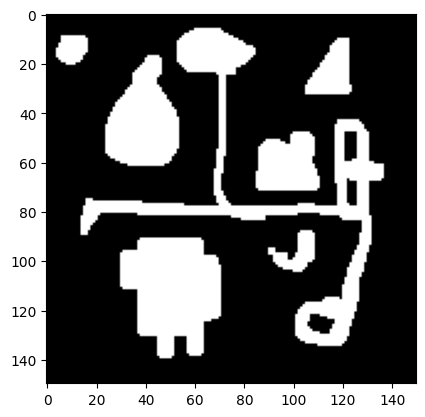

In [2]:
path1 = "./assets/sample.png"
path2 = "./assets/dino.png"
img1 = cv.imread(path1)
plt.imshow(img1)

### Read the image in original and grayscale format and convert it to binary format via thresholding

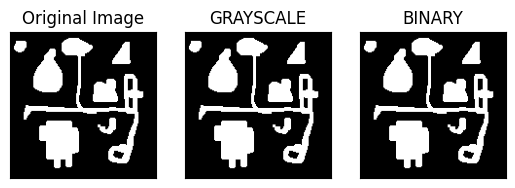

In [3]:
img = cv.imread(path1)
gray = cv.imread(path1, cv.IMREAD_GRAYSCALE)
ret,thresh = cv.threshold(gray,100,255,cv.THRESH_BINARY)
titles = ['Original Image', 'GRAYSCALE', 'BINARY']
images = [img, gray, thresh]

for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Create a duplicate of the image

In [4]:
# identify the dimensions of image to traverse it
rows, cols = thresh.shape[0], thresh.shape[1]
# initialise label value to 0
label = 0
# dictionary to maintain relation between labels if it exists 
equivalency_dict = {}

In [5]:
# traverse the image row-wise
for i in range(rows):
  for j in range(cols):
    # mark the pixel and it's top and left neighbour
    curr_pixel = thresh[i][j]
    top = thresh[i-1][j] if i > 0 else 0
    left = thresh[i][j-1] if j > 0 else 0
    
    # if the current pixel is part of foreground
    if curr_pixel == 255:
      # if the pixel is not connected to any component 
      if top == 0 and left == 0:
        # update label when new component discovered
        label += 1
        # mark the pixel with label
        thresh[i][j] = label
        # add the relation to dict
        equivalency_dict[label] = label

      elif top != 0 and left == 0:
        thresh[i][j] = top
            
      elif top == 0 and left != 0:
        thresh[i][j] = left

      else:  # Both top and left are nonzero
        min_label = min(top, left)
        max_label = max(top, left)
        # label the pixel with minimum value
        thresh[i][j] = min_label
        # add the relation between the max_label and min_label into dict
        if equivalency_dict[int(max_label)] > int(min_label):
          equivalency_dict[int(max_label)] = int(min_label)


### Dictionary showing various equivalencies 

In [6]:
print(equivalency_dict)

{1: 1, 2: 1, 3: 2, 4: 4, 5: 3, 6: 5, 7: 7, 8: 6, 9: 7, 10: 4, 11: 9, 12: 11, 13: 10, 14: 12, 15: 15, 16: 14, 17: 15, 18: 16, 19: 17, 20: 18, 21: 19, 22: 21, 23: 20, 24: 22, 25: 23, 26: 24, 27: 25, 28: 27, 29: 28, 30: 26, 31: 29, 32: 30, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 1, 42: 40, 43: 41, 44: 44, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 1, 51: 41, 52: 50, 53: 49, 54: 1, 55: 1, 56: 54, 57: 56, 58: 58, 59: 58, 60: 1, 61: 61, 62: 61, 63: 60, 64: 59, 65: 62, 66: 63, 67: 65, 68: 59, 69: 66, 70: 64, 71: 69, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 75, 78: 77, 79: 78, 80: 79, 81: 80, 82: 75, 83: 77}


#### Find minimal equivalence_dict from equivalence_dict

In [7]:
# Function to find root label
def find_root(label, eq_dict):
    while eq_dict[label] != label:
        label = eq_dict[label]
    return label

# Create minimal equivalency dict
minimal_equivalency_dict = {}
for key in equivalency_dict:
    root = find_root(key, equivalency_dict)
    minimal_equivalency_dict[key] = root

# Also ensure that all root values point to themselves
for val in minimal_equivalency_dict.values():
    minimal_equivalency_dict[val] = val

print("Minimal Equivalency Dict:")
print(minimal_equivalency_dict)

Minimal Equivalency Dict:
{1: 1, 2: 1, 3: 1, 4: 4, 5: 1, 6: 1, 7: 7, 8: 1, 9: 7, 10: 4, 11: 7, 12: 7, 13: 4, 14: 7, 15: 15, 16: 7, 17: 15, 18: 7, 19: 15, 20: 7, 21: 15, 22: 15, 23: 7, 24: 15, 25: 7, 26: 15, 27: 7, 28: 7, 29: 7, 30: 15, 31: 7, 32: 15, 33: 15, 34: 15, 35: 15, 36: 15, 37: 15, 38: 15, 39: 15, 40: 15, 41: 1, 42: 15, 43: 1, 44: 44, 45: 44, 46: 44, 47: 44, 48: 44, 49: 44, 50: 1, 51: 1, 52: 1, 53: 44, 54: 1, 55: 1, 56: 1, 57: 1, 58: 58, 59: 58, 60: 1, 61: 61, 62: 61, 63: 1, 64: 58, 65: 61, 66: 1, 67: 61, 68: 58, 69: 1, 70: 58, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1}


### Re-traverse the image to update the label based on minimal equivalency_dict

In [8]:
for i in range(rows):
  for j in range(cols):
    # mark the pixels
    curr_pixel = thresh[i][j]
    top = thresh[i-1][j] if i > 0 else 0
    left = thresh[i][j-1] if j > 0 else 0
    
    # if the current pixel is part of foreground
    if curr_pixel != 0:
      # update the label
      connected_label = minimal_equivalency_dict[curr_pixel]
      thresh[i][j] = connected_label

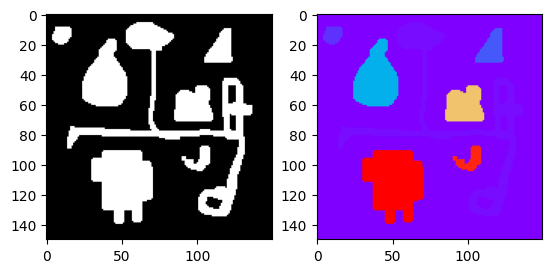

In [9]:
f = plt.figure()
f.add_subplot(1,2,1)
plt.imshow(img)
f.add_subplot(1,2,2)
plt.imshow(thresh, cmap='rainbow')
plt.show(block=True)